# The need for functions


This code will take a set of observations and find the mean, median, variance and standard deviation of data set 1

In [ ]:
import statistics
data1 = [1, 45, 67, 8, 99.2, 60, 3.2, 12]
mean_data = statistics.mean(data1)
med_data = statistics.median(data1)
var_data = statistics.variance(data1)
std_data = statistics.stdev(data1)

data2 = [56, 78, 55, 12, 1.3, 99.6, 200.5]
data3 = [1, 1, 1, 5, 77, 1.2, 4, 2.6]

"""Solution"""

def data_stat_finder(data_set, do_mean=True, do_med=True, do_std=True, do_var=True):
    if do_mean:
        mean_data = statistics.mean(data_set)
    if do_std:
        std_data = statistics.stdev(data_set)
    if do_var:
        var_data = statistics.variance(data_set)
    if do_med:
        med_data = statistics.median(data_set)
    return mean_data, std_data, var_data, med_data

print(data_stat_finder(data1))

1) Find the mean, median, variance and standard deviation of data sets 2 and 3.

2) If you didn't use a function to do this, attempt it using a function. How many lines of code did you save?

# Procedures vs functions 

4) Edit the code below so that things_to_print is returned by the function and assign the returned value to a variable.

In [2]:
def i_print_things(things_to_print):
    print(things_to_print)
    
print_job = 'This is a silly example function'
i_print_things(print_job)

"""Solution"""

def i_return_things(things_to_return):
    return(things_to_return)
    
return_job = 'This is a silly example function'
thing_that_was_returned = i_return_things(return_job)
print(thing_that_was_returned)

This is a silly example function
This is a silly example function


5) Write a function that will take two input strings and returns them joined together as one string

In [ ]:
def string_joiner(string1, string2):
    return '{} {}'.format(string1, string2)

print(string_joiner('dogs are', 'pawsome'))

# Scope (local vs global variables)

6) Why does the following code produce an error? Edit the code so that it prints the correct value for data_mean.

In [ ]:
import statistics

def mean_calculator(data):
    data_mean = statistics.mean(data)
    
data1 = [1, 45, 67, 8, 99.2, 60, 3.2, 12]
mean_calculator(data1)
print(data_mean)

"""Solution"""

import statistics

def mean_calculator(data):
    data_mean = statistics.mean(data)
    return data_mean

data1 = [1, 45, 67, 8, 99.2, 60, 3.2, 12]
data_mean1 = mean_calculator(data1)
print(data_mean1)

"""You need to use the retrun statement to get things out
of the function. Also if you want them to live pas the execution of the
function, you need to assign them to a variable"""


# Keyword arguments

7) You work in a shop. Normally you do trade in pounds (£), but you do accept other currencies. Edit the function below so that it's default is to return the price in pounds but can (if instructed to do so) return the price in other currencies.

In [ ]:
def price_printer(product, price, currency):
    print('The {0} is {1}{2:.2f}'.format(product, currency, price))

product1 = 'apple'
price1 = 0.6
currency1 = '£'
price_printer(product1, price1, currency1)
# note: the :.2f is specifying that the price should be printed to 2d.p.

"""Solution"""

def price_printer(product, price, currency='£'):
    print('The {0} is {1}{2:.2f}'.format(product, currency, price))

product1 = 'apple'
price1 = 0.6
currency1 = '£'
price_printer(product1, price1, currency1)
price_printer(product1, price1, '$')

8a) You have some behavioural data from a ferret doing a 2AFC task. The data consists of 50 trials for several training sessions for one ferret. Trials are 'correct', 'incorrect' or 'missed'. To decide if the ferret should proceed to the next stage of training you decide on criteria of at least 70% correct of the trials that were not missed, and no more than 5 missed trials per session. Write a function that will return 'Continue training' or 'Don't continue training' based on these criteria. Use default arguments to set the criteria.

In [ ]:
import random

# This is just a function that generates ferret training data. No real ferrets were used in the making this exercise.
def ferret_data_generator(number_sessions, number_trials, possible_outcomes, performance):
    ferret_data = []
    for session in range(number_sessions):
        ferret_data.append(random.choices(possible_outcomes, weights=performance, k=number_trials))
    return ferret_data
       
# ferret data is a nested list of 5 sessions, each with 50 trials
n_sessions = 5
n_trials = 50
outcomes = ['correct', 'incorrect', 'missed']
performance_ratio = [60, 37, 3]

ferret1_data = ferret_data_generator(n_sessions, n_trials, outcomes, performance_ratio)


""" Solution """
def ferret_training_evaluator(training_data, percentage_correct_criterion=70, max_missed_per_session=5):
    n_missed_records_per_sessions = [session.count('missed') for session in training_data]
    
    continue_training = True
    if all([e <= max_missed_per_session for e in n_missed_records_per_sessions]):
        # Another valid way to do this (the question wasn't clear) is to calculate the percentage correct session-wise
        flattened_data = list(trial for session in training_data for trial in session)
        n_missed_trials = flattened_data.count('missed')
        percentage_correct = flattened_data.count('correct')/(len(flattened_data) - n_missed_trials) * 100
        
        if percentage_correct >= percentage_correct_criterion:
            continue_training = False
            
    return 'Continue training' if continue_training else "Don't continue training"

ferret_training_evaluator(ferret1_data)

8b) Below is a very simple function. Does it do what you expected? Why does this happen? Why is this a problem? Fix it.

In [1]:
def cummulative_sum(current_observations=[], new_value=[]):
    current_observations += new_value
    updated_observations = current_observations
    return updated_observations

initial_observations = [1]
new_values = [0.2, 0.6]
updated = cummulative_sum(current_observations=initial_observations, new_value=new_values)
print('updated observation list:', updated)
print('initial observation list:', initial_observations)

"""Solution"""

def cummulative_sum_fixed(current_observations=[], new_value=[]):
    updated_observations = current_observations + new_value
    return updated_observations

initial_observations = [1]
new_values = [0.2, 0.6]
updated = cummulative_sum_fixed(current_observations=initial_observations, new_value=new_values)
print('updated observation list:', updated)
print('initial observation list:', initial_observations)

"""
The input is a list which is mutable so when you change current_observations inside the function,
it is also changed outside the function.
To avoid this, whenever passing arguments to a function, consider using tuples instead of lists.
"""

updated observation list: [1, 0.2, 0.6]
initial observation list: [1, 0.2, 0.6]
updated observation list: [1, 0.2, 0.6]
initial observation list: [1]


'\nThe input is a list which is mutable so when you change current_observations inside the function, it is also changed outside the fucntion.\n'

# Star arguments

9) The ferret training is going very well and now you have trained 3 ferrets. Adapt your function so that it can handle multiple input data sets (hint: star arguments may be useful here).

In [ ]:
ferret2_data = ferret_data_generator(sessions, trials, outcomes, [80, 11, 9])
ferret3_data = ferret_data_generator(sessions, trials, outcomes, [79, 1, 20])

"""Solution"""
def multi_ferret_training_evaluator(*training_data):
    for ferret_data in training_data:
        yield ferret_training_evaluator(ferret_data)

for result in ferret_training_evaluator(ferret1_data, ferret2_data, ferret3_data):
    print(result)

10) Write a function that will print the ferret ID (ferret1, ferret2, ferret3) alongside the percentage corrrect and the percentage of missed trials for each ferret. A nice way of doing this is using ** keyword arguments.

In [ ]:
"""Solution"""
def ferret_training_evaluator(**training_data):
    for ferret_id, ferret_data in training_data.items():
        # Another valid way to do this (the question wasn't clear) is to calculate the percentage correct session-wise
        flattened_data = [trial for session in ferret_data for trial in session]
        n_trials = len(flattened_data)
        percentage_missed = flattened_data.count('missed') / n_trials * 100
        percentage_correct = flattened_data.count('correct') / n_trials * 100
        print('{}: correct = {}%, missed = {}%'
              .format(ferret_id, percentage_correct, percentage_missed))

ferret_training_evaluator(ferret1=ferret1_data, ferret2=ferret2_data, ferret3=ferret3_data)

# Using the features of the IDE
You have the following code and realise that the part that reads the data is used often and could become a function.

11a) Using the refactoring functionality of pycharm, try to extract this code to a function. HINT: pycharm uses the word *method* because most of the time you are dealing with object oriented code in python and functions inside objects are called methods. However, this works for any function.

In [ ]:
source_file_path = './resources/test_events.dat'
with open(source_file_path, 'r') as input_file:
    data = input_file.readlines()
    data = [d.strip() for d in data]
    data = [[float(n) for n in d.split(',')] for d in data if d]
print(data)

In [ ]:
"""Solution
Use pycharm: select the code, right click > refactor > extract method
To move the function to another file, use right click > refactor > move
"""

def read_data(path):
    with open(source_file_path, 'r') as input_file:
        data = input_file.readlines()
        data = [d.strip() for d in data]
    return data

def read_float_data(path):
    data = read_data(path)
    data = [[float(n) for n in d.split(',')] for d in data if d]
    return data

source_file_path = './resources/test_events.dat'
print(read_float_data(source_file_path))

b) You actually realise that this code deserves 2 functions. Split accordingly (still using the refactoring shortcuts)

c) You notice that the functionality in the first function is quite generic and is used in other modules of your project. Deal with this again using the refactoring capabilities of Pycharm.

# Errors and testing


12a) Sometimes your code doesn't work and python gives you an error message. The example below is a clear example of such a problem. What is making the error message appear?

b) Use 'try' and 'except' to print the string 'oops there was an error' when this type of error occurs. Specifiy in the string what type of error it was

In [1]:
#def voltage_ratio_calculator(v1, v2):
#    v_ratio = v1 / v2
#    return v_ratio
#for voltage1 in range(3):
#    for voltage2 in range(2):
#        voltage_ratio_calculator(voltage1, voltage2)

"""Solution"""
def voltage_ratio_calculator(v1, v2):
    try:
        v_ratio = v1 / v2
        return v_ratio
    except ZeroDivisionError as error:  # Do not catch too wide (e.g. Exception) as you may get more than you can chew
        print('Voltage calculator failed as the second voltage was 0; {}'.format(error))
        
for voltage1 in range(3):
    for voltage2 in range(2):
        voltage_ratio_calculator(voltage1, voltage2)

Voltage calculator failed as the second voltage was 0: division by zero
Voltage calculator failed as the second voltage was 0: division by zero
Voltage calculator failed as the second voltage was 0: division by zero


13)

Not all problems are so clear. They may not return built in errors (exceptions). It is good practice to find a way to test if a function does what you want it to do. 

You have written a function that will check that a user has input a proper email address in a form.
You discover that your function is incomplete and decide to add more
For example, you want to check that there are no unathorised characters in the email addresses.

Write a test function that verifies that your email checking function:
  1. accepts valid addresses.
  2. rejects invalid addresses.

Passing functions to other functions becomes much more useful when using decorators. We'll talk more about these later but the curious can read about them here: http://www.brianholdefehr.com/decorators-and-functional-python


In [1]:
email_address = input('please enter your email address')

def check_email_address(address):
    return len(address) > 0

if check_email_address(email_address):
    print('"{}" is a valid email address'.format(email_address))
else:
    print('"{}" is an invalid email address'.format(email_address))
    
    

please enter your email addressme@there.com
"me@there.com" is a valid email address


In [4]:
"""Solution"""

def test_email_validator():
    test_addresses = (
        ('b@d@dress@b@dDom@in', False),
        ('good_address@valid_domain.com', True),
        (None, False),
        ('', False),
        ('@domain.com', False),
        (42, False)
    )
    for address, expected_result in test_addresses:
        expected_result_str = 'succeed' if expected_result else 'fail'
        assert check_email_address(address) == expected_result, "Address {} shoud {} but didn't".format(address, expected_result_str)
        
test_email_validator()
        
"""Of course you now need to modify the email validator so that the
test function passes"""

AssertionError: Address b@d@dress@b@dDom@in shoud fail but didn't

    a Write a function that will calculate the sample variance of some data (don't use an statistics.variance).

    b Use statistics.variance to test that your function works and gives correct answers.

    c Write a function that generates random multiples of 3 between 3 and 99.

    d Test this function to make sure that the outputs are divisible by three.

Save your test code (and test inputs and outputs). We will use these later in the course.

In [21]:
"""Solution for part a"""
import statistics

def sample_variance_calculator(input_dataset):
    """
     Calculates the sample variance of the input dataset using unbiased estimator formula.
     
    :param tuple input_dataset: The data for which you want the sample varaince
    :return: sample variance of input_dataset
    :rtype: float
    """
    sample_mean = statistics.mean(input_dataset)
    sample_variance = 1/(len(input_dataset) - 1)*sum([(data_point - sample_mean)**2 for data_point in input_dataset])
    return sample_variance

In [24]:
"""
Solution for part b
There are many ways to do this. This is just one simple way.
"""

def function_tester(function_to_be_tested, function_input, desired_output):
    function_output = function_to_be_tested(function_input)
    print('The desired output was {} and the function produced {}'.format(desired_output, function_output))

test_input = (0.23, 3.6, 7.8, 1.34, 0.1, 10.5)
function_tester(sample_variance_calculator, test_input, statistics.variance(test_input))

The desired output was 18.663536666666666 and the function produced 18.66353666666667


In [4]:
"""Solution for part c"""
import random

def random_multiple_of_3_generator(min_val=3, max_val=99):
    random_num = random.randint(min_val, max_val//3)
    random_multiple_of_3 = 3 * random_num
    return random_multiple_of_3

In [7]:
"""
Solution for part d
Again, many ways to do this.
"""
class MultipleException(Exception):
    pass

def multiple_tester(function_to_be_tested, multiple=3):
    function_output = function_to_be_tested()
    if function_output % multiple == 0:
        print('The output was {}, which is a multiple of {}'.format(function_output, multiple))
    else:
        raise MultipleException('ERROR: The output was {}, which is NOT a multiple of {}'.format(function_output, multiple))

def not_a_multiple_of_3_generator():
    return 2

multiple_tester(random_multiple_of_3_generator)
multiple_tester(not_a_multiple_of_3_generator)

The output was 18, which is a multiple of 3


MultipleException: ERROR: The output was 2, which is NOT a multiple of 3

# Documenting your code

14a) document the following function assuming that b is an integer

In [ ]:
def a_to_the_power_b(a, b):
    power_result = a**b
    return power_result

In [2]:
def a_to_the_power_b(a, b):
    """
    Raises a to the power of b.
    a and b are expected to be integers.

    :param int a: The mantissa
    :param int b: The exponent
    :return: a raised to the power b
    :rtype: int
    """
    power_result = a**b
    return power_result

b) Try to visualise this documentation in pycharm using the quick documentation tool
Solution: Use your function, then click on the function name, Select in the top menu view > quick documentation. Note the shortcut, it will come in handy.

c) Add a test for 3^2 and 1^1 in your docstring

In [3]:
"""
This is called a doctest. It is one of the numerous ways to automatically test
code in python. it works for simple functions and can provide documentation
"""

def a_to_the_power_b(a, b):
    """
    Raises a to the power of b.
    a and b are expected to be integers.
    
    >>> a_to_the_power_b(3, 2)
    9
    >>> a_to_the_power_b(1, 1)
    1

    :param int a: The mantissa
    :param b: The exponent
    :return: a raised to the power b
    :rtype: int
    """
    power_result = a**b
    return power_result

import doctest
doctest.testmod()  # This is required only in jupyter, a proper IDE can automatically test for doctest

TestResults(failed=0, attempted=2)

d) If not done yet, ensure that you specified the argument and return types above

# Long exercise

You have inherited the following code from a previous student in your lab. 
This code takes a file as input that contains the description of a neuron's morphology. Each time the user clicks a point, it adds the segment corresponding to the piece of dendrite followed using the currently set dendrite diameter as diameter of this segment. The program reads this file and computes the volume of the neuron. You would like to extend it to measure the total dendritic length but first, you have decided that to extend code, you first need to make it clean. Try to make it the cleanest and most modular possible using what you have learned above.

HINT: you may want to think about the *module* part of modular.

What are the benefits ?

In [45]:
"""Ideally the functions would be in seperate files, grouped by funtionality 
(file_io.py, geometry.py, tree_geometry.py)
but we can't do this in jupyter. Make these files in Pycharm and import the functions from the appropriate modules."""

""" File io module """
def read_data_file(file_path):
    with open(file_path, 'r') as data_file:
        data = data_file.readlines()
        data = [d.strip() for d in data]
    return data


def read_ints_from_data_file(file_path, skip_header=False, split_char=','):
    """
    This is an example. In real life, you would use pandas for this.
    """
    data = read_data_file(file_path)
    if skip_header:
        data = data[1:]
    out = []
    for line in data:
        out.append([int(c) for c in line.split(split_char)])
    return out


""" Geometry module """
import math


def get_disc_area(diameter):
    radius = diameter / 2.0
    return math.pi * radius**2


def get_cylinder_volume(p1, p2, diameter):
    disc_area = get_disc_area(diameter)
    return disc_area * get_euclidian_distance(p1, p2)


def get_euclidian_distance(p1, p2):
    if len(p1) != len(p2):
        raise ValueError('point1 and point2 should have the same number of elements. Got {}'.
                        format(p1, p2))
    n_dims = len(p1)
    return math.sqrt(sum([(p2[i] - p1[i])**2 for i in range(n_dims)]))


""" Tree geometry module uncomment the following 2 lines
if in separate module"""
# from file_io import read_ints_from_data_file
# from geometry import get_cylinder_volume


def parse_diameter_and_point(line):
    """
    This extracts the diameter and point (x, y, z) variables from
    a line in our file
    
    The file has this format:
    index, x, y, z, diameter
    
    This is here because this format is very specific of this particular
    file
    """
    point = line[1:4]
    diameter = line[-1]
    return diameter, point


def get_dendrite_volume_from_file(file_path):
    """
    This will read a 'dendrite' file with the following format:
    index, x, y, z, diameter
    and extract the values to compute the total volume 
    by summing up the various segments.
    """
    data = read_ints_from_data_file(file_path, skip_header=True)
    total_dendrite_volume = 0
    for i in range(1, len(data)-1):
        line1 = data[i]
        _, point1 = parse_diameter_and_point(line1)

        line2 = data[i+1]
        diameter2, point2 = parse_diameter_and_point(line2)
        # print(point1, point2)
        total_dendrite_volume += get_cylinder_volume(point1, point2, diameter2)
    return total_dendrite_volume


print(get_dendrite_volume_from_file('./resources/neuron_a_38.txt'))

256.35157221701616


# Python error messages
Analyse the tracebacks below and describe the error and ways to fix them

```python
python pyper/gui/tracking_gui.py 
Traceback (most recent call last):
  File "pyper/gui/tracking_gui.py", line 18, in <module>
    from pyper.video.transcoder import TranscoderIface
  File "/home/user/code/pyper_dev/pyper/video/transcoder.py", line 12, in <module>
    import numpy as np
ImportError: No module named numpy
```

### Solution
Look at the last line, numpy cannot be found. It is probably not installed on the system.

```python
Traceback (most recent call last):
  File "/home/user/code/pyper_dev/pyper/gui/tabs_interfaces.py", line 200, in load
    self.stream = VStream(self.params.src_path, 0, 1)
  File "/home/user/code/pyper_dev/pyper/video/video_stream.py", line 417, in __init__
    tmp_capture = VideoCapture(file_path)
  File "/home/user/code/pyper_dev/pyper/cv_wrappers/video_capture.py", line 46, in __init__
    raise VideoCaptureOpenError("Could not open file {} for reading; {}".format(filename_or_cam, err))
pyper.cv_wrappers.video_capture.VideoCaptureOpenError: Could not open file /tmp/teleporter.h264 for reading; [Errno 13] Permission denied: '/tmp/teleporter.h264'
Aborted (core dumped)
```

This one is special and a bit more difficult. Can you tell why ?

### Solution
There is the aborted core dump message. This is because the error triggered an issue in a C/C++ library.
The message is still clear though. We do not have the permission for the file we are trying to load.

```python
Traceback (most recent call last):
  File "/home/user/code/pyper_dev/pyper/gui/image_providers.py", line 45, in requestPixmap
    qimg, qSize = self.requestImage(id, qSize)
  File "/home/user/code/pyper_dev/pyper/gui/image_providers.py", line 54, in requestImage
    qimg = self.getBaseImg(size)
  File "/home/user/code/pyper_dev/pyper/gui/image_providers.py", line 114, in getBaseImg
    img = self._stream.read()
  File "/home/user/code/pyper_dev/pyper/gui/gui_tracker.py", line 47, in read
    result = self.track_frame(record=self.record, requested_output=self.ui_iface.output_type)
  File "/home/user/code/pyper_dev/pyper/tracking/tracking.py", line 256, in track_frame
    print('Error with video_stream at frame {}: \n{}'.format(fid, e))
UnboundLocalError: local variable 'fid' referenced before assignment
Aborted (core dumped)
```

Again the last line is quite explicit. We are trying to access a variable 'fid' before assignemnt. This means that the variable is created in a conditional statement that has not been executed before we try and use it.

# Return/ yield

It can be useful to return results of a computation on the fly rather than at the end of a function. For this we can use the keyword 'yield' instead of 'return'.

Run the cell below:

In [15]:
def search(search_list, search_value):
    print('generator started')
    for a in search_list:
        if a == search_value:
            print(a)
            return a
        
list_for_searching = (0, 4, 6, 2, 9)
val = 2
the_generator = search(list_for_searching, val)
print(type(search))
print(type(the_generator))

generator started
2
<class 'function'>
<class 'int'>


Now run the following cell. What is different? Why?

In [17]:
def search(search_list, search_value):
    print('generator started')
    for a in search_list:
        if a == search_value:
            print(a)
            yield a
            
list_for_searching = (0, 4, 6, 2, 9)
val = 2
the_generator = search(list_for_searching, val)
print(type(search))
print(type(the_generator))

"""Solution"""
for v in the_generator:
    pass

<class 'function'>
<class 'generator'>
generator started
2


## Explaination
The difference is that the line
```python
the_generator = search(list_for_searching, val)
```
does not execute the body of the generator until we try iterating over it (which we are not doing here). The last 2 lines will now thus print what we expect.

Read this about generators and the 'yield' keyword and write some code that will search through the folder of tissue vision files we gave you in assignment 1 ('/resources/tissue_vision_files/') looking for files with the date 02162018. Make each filename be printed as it is found by the search.

https://www.pythoncentral.io/python-generators-and-yield-keyword/

In [9]:
import os
source_folder = './resources/tissue_vision_files/'  # Amend as required

source_folder = os.path.normpath(source_folder)  # Will make it work regardless of platform
file_names_list = os.listdir(source_folder)
file_names_list = [f for f in file_names_list if f.endswith('.tif')]
start, end = 100, 200
n_channels = 3

"""
def rename_file(src_filename):
    date, time, rest = filename.split('-')
    index, channel_with_extension = rest.split('_')
    new_filename = '{}-{}-{}_{}'.format(date, time, str(index).zfill(4), channel_with_extension)
"""

for channel in range(n_channels):
    channels_file_names = file_names_list[channel::n_channels]
    desired_channel_file_names = channels_file_names[start:end]
    """The issue with these filenames is the lack of padding which prevents alphabetical sorting
    To remedy this, one could use str.zfill to implement zero padding.
    
    to do it, uncomment the function above and insert the following line below:
    desired_channel_file_names = [rename_file(f) for f in desired_channel_file_names]
    """
    modified_channel_file_names = [f.replace('.tif', '_modified.tif') for f in desired_channel_file_names]


In [10]:
def get_date_chars(filename):
    return filename[:7]

def search_for_date(search_list, search_date):
    print('generator started')
    for filename in search_list:
        filedate = get_date_chars(filename)
        yield filename
        

for search_result in search_for_date(modified_channel_file_names, '02162018'):
    print(search_result)

generator started
02162018-1620-190_03_modified.tif
02162018-1620-191_03_modified.tif
02162018-1620-192_03_modified.tif
02162018-1620-193_03_modified.tif
02162018-1620-194_03_modified.tif
02162018-1620-195_03_modified.tif
02162018-1620-196_03_modified.tif
02162018-1620-197_03_modified.tif
02162018-1620-198_03_modified.tif
02162018-1620-199_03_modified.tif
02162018-1620-19_03_modified.tif
02162018-1620-1_03_modified.tif
02162018-1620-200_03_modified.tif
02162018-1620-201_03_modified.tif
02162018-1620-202_03_modified.tif
02162018-1620-203_03_modified.tif
02162018-1620-204_03_modified.tif
02162018-1620-205_03_modified.tif
02162018-1620-206_03_modified.tif
02162018-1620-207_03_modified.tif
02162018-1620-208_03_modified.tif
02162018-1620-209_03_modified.tif
02162018-1620-20_03_modified.tif
02162018-1620-210_03_modified.tif
02162018-1620-211_03_modified.tif
02162018-1620-212_03_modified.tif
02162018-1620-213_03_modified.tif
02162018-1620-214_03_modified.tif
02162018-1620-215_03_modified.tif


# Functions as variables / arguments

Use jupyter interact and see how you can pass it your function to see the evolution of your computation as you change the parameters.
a) Use interact to make the wheel spin
b) Try that with a decorator

In [12]:
def wheel(x):
    symbols = "|/-\\"
    print(symbols[x%4])
    

In [13]:
"""Solution"""
from ipywidgets import interact

interact(wheel, x=10)

<function __main__.wheel>

a) Fix the load function below so that it accepts an arbitrary filtering function and its arguments

b) Use this load function to build stacks with gaussian, median and scale 0.5 filters

(10, 1664, 1664)


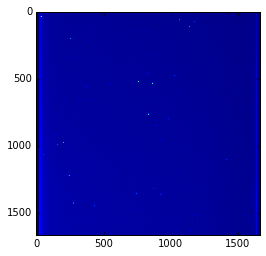

(10, 1664, 1664)


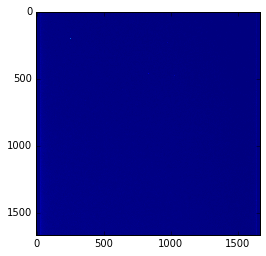

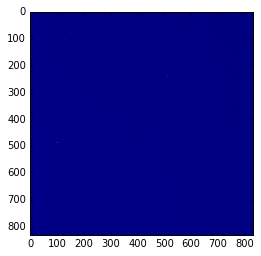

In [42]:
import tifffile.tifffile
from natsort import natsorted

from matplotlib import pyplot as plt

from scipy.ndimage.filters import gaussian_filter
from scipy.signal import medfilt
from scipy.ndimage.interpolation import zoom

def load(image_folder_path, filtering_function=None, *filter_function_params):
    files_names = (f for f in os.listdir(image_folder_path) if f.endswith('.tif'))
    files_paths = (os.path.abspath(os.path.join(image_folder_path, f)) for f in files_names)

    imgs = []
    for file_path in natsorted(files_paths)[:10]:  # WARNING: we take only the first 10 for the test to run fast
        img = tifffile.imread(file_path)
        if filtering_function is not None:
            img = filtering_function(img, *filter_function_params)
        imgs.append(img)

    return np.array(imgs)


folder_path = ''  # Amend to folder with tiffs

gaussian_stack = load(folder_path, gaussian_filter, 2)
print(gaussian_stack.shape)
plt.imshow(gaussian_stack.mean(0)); plt.show()
median_stack = load(folder_path, medfilt, 3)
print(median_stack.shape)
plt.imshow(median_stack.mean(0)); plt.show()
scaled_stack = load(folder_path, zoom, 0.5)
print(scaled_stack.shape)
plt.imshow(scaled_stack.mean(0)); plt.show()